# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
api = weather_api_key
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + api + "&units=" + units + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tocopilla
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | fortuna
Processing Record 4 of Set 1 | kisangani
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | laojunmiao
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | juliaca
Processing Record 12 of Set 1 | port lincoln
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | amga
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | yei
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | tolanaro
Processing Record 22 of Set 1 | nevel'sk
Proce

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tocopilla,-22.0920,-70.1979,18.31,67,9,2.93,CL,1724791313
1,mount gambier,-37.8333,140.7667,10.14,62,74,7.60,AU,1724791323
2,fortuna,40.5982,-124.1573,20.19,76,0,6.17,US,1724791326
3,kisangani,0.5167,25.2000,23.31,84,53,0.95,CD,1724791328
4,yellowknife,62.4560,-114.3525,20.23,76,75,2.57,CA,1724791330


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tocopilla,-22.0920,-70.1979,18.31,67,9,2.93,CL,1724791313
1,mount gambier,-37.8333,140.7667,10.14,62,74,7.60,AU,1724791323
2,fortuna,40.5982,-124.1573,20.19,76,0,6.17,US,1724791326
3,kisangani,0.5167,25.2000,23.31,84,53,0.95,CD,1724791328
4,yellowknife,62.4560,-114.3525,20.23,76,75,2.57,CA,1724791330


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

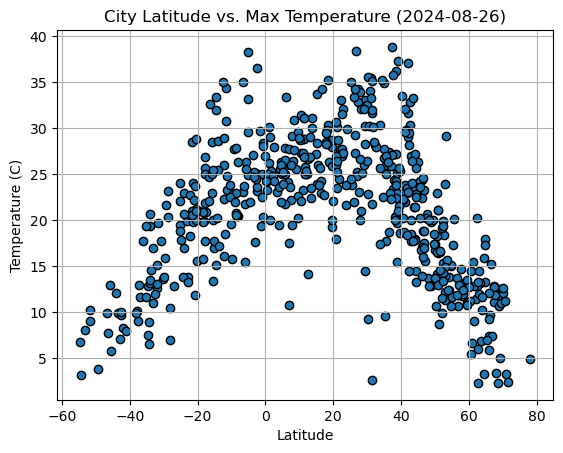

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-08-26)")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

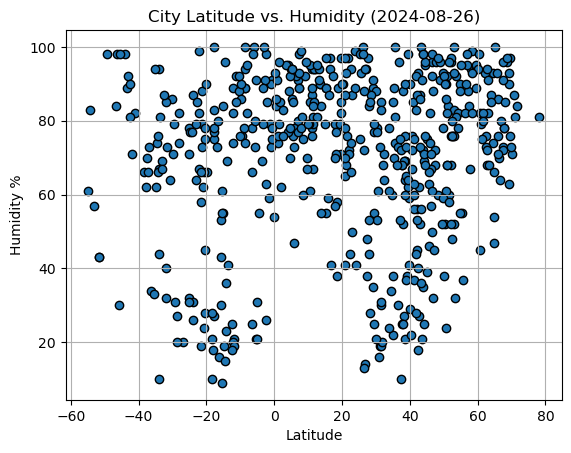

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-08-26)")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

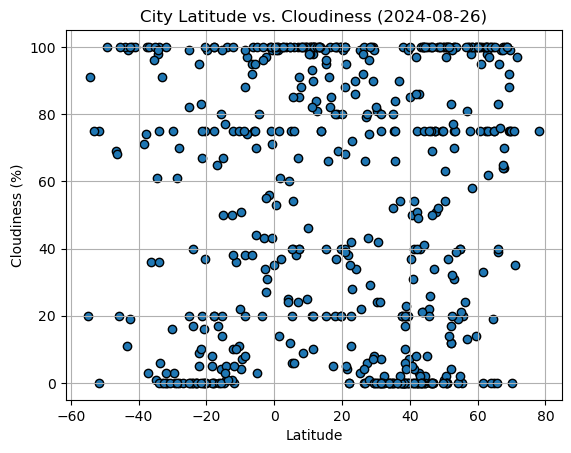

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-08-26)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

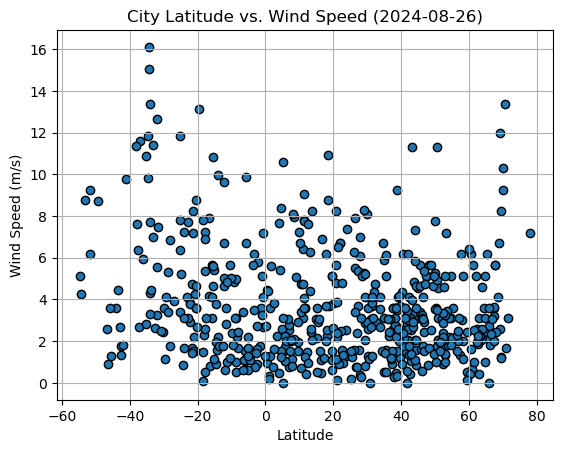

In [34]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-08-26)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
x = df["Lat"]
y = df[""]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept


In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,fortuna,40.5982,-124.1573,20.19,76,0,6.17,US,1724791326
3,kisangani,0.5167,25.2000,23.31,84,53,0.95,CD,1724791328
4,yellowknife,62.4560,-114.3525,20.23,76,75,2.57,CA,1724791330
5,laojunmiao,39.8333,97.7333,18.60,59,7,1.21,CN,1724791333
12,isafjordur,66.0755,-23.1240,5.95,86,39,2.74,IS,1724791353


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tocopilla,-22.0920,-70.1979,18.31,67,9,2.93,CL,1724791313
1,mount gambier,-37.8333,140.7667,10.14,62,74,7.60,AU,1724791323
6,puerto natales,-51.7236,-72.4875,10.25,43,75,9.26,CL,1724791336
7,adamstown,-25.0660,-130.1015,19.45,71,99,7.83,PN,1724791340
8,port-aux-francais,-49.3500,70.2167,3.83,98,100,8.71,TF,1724791343


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.6626957072374843


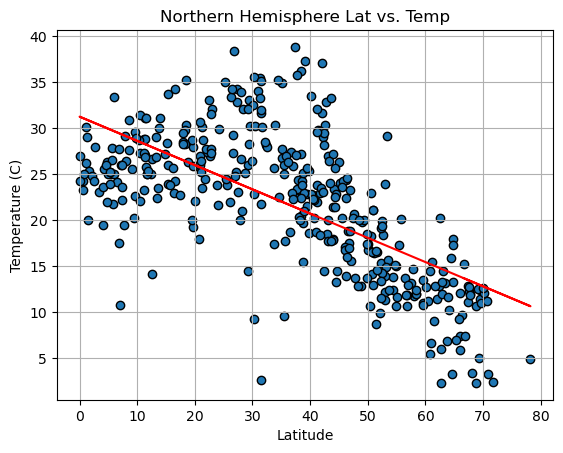

In [44]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o", edgecolors='black')
plt.plot(x, line, color='red', label='Regression Line')
plt.title("Northern Hemisphere Lat vs. Temp")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r^2-value is: {r_value}")

The r^2-value is: 0.7636483963788749


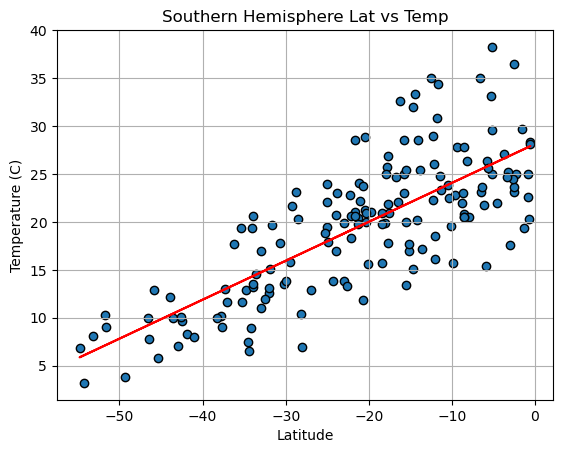

In [46]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o", edgecolors='black')
plt.plot(x, line, color='red', label='Regression Line')
plt.title("Southern Hemisphere Lat vs Temp")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r^2-value is: {r_value}")

**Discussion about the linear relationship:** Based on the two graphs above, there is an obvious correlation between countrys' distance from the equater and their temperature. In both graphs, the temperature increases as the distance to the equator decreases. The temperatures in the southern hemisphere do seem to be higher. This could be due to other forces, such as the tilt of the earth's axis.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: -0.0462918425491753


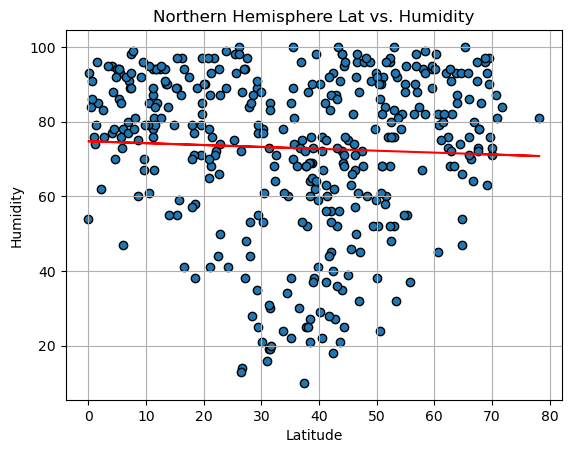

In [50]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", edgecolors='black')
plt.plot(x, line, color='red', label='Regression Line')
plt.title("Northern Hemisphere Lat vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r^2-value is: {r_value}")

The r^2-value is: 0.008046882266557337


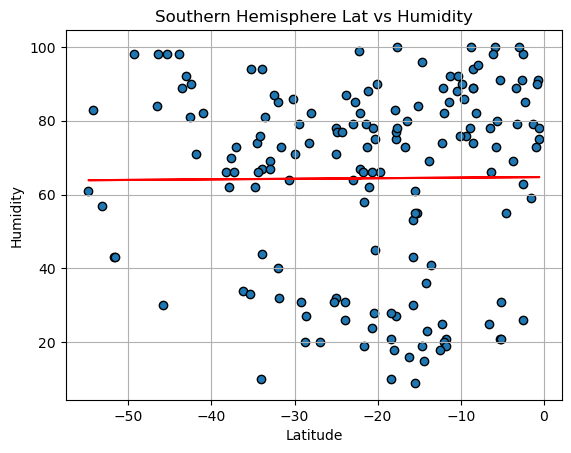

In [52]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", edgecolors='black')
plt.plot(x, line, color='red', label='Regression Line')
plt.title("Southern Hemisphere Lat vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r^2-value is: {r_value}")

**Discussion about the linear relationship:** Based on the graphs above, there seems to be no difference between the northern and southern hemisphere in terms of humidity. The northern hemisphere is slightly more humid. It also seems that there's no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: -0.03766083443811519


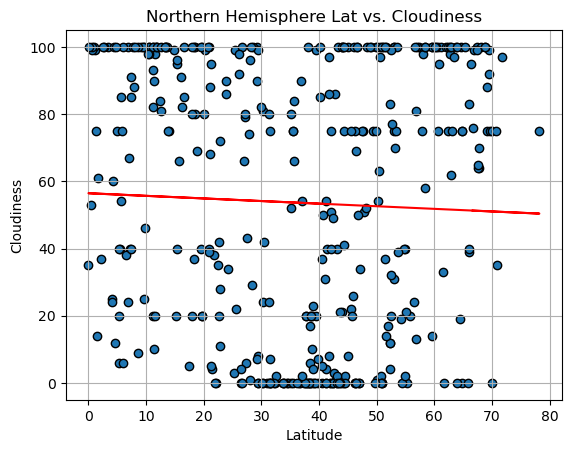

In [55]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", edgecolors='black')
plt.plot(x, line, color='red', label='Regression Line')
plt.title("Northern Hemisphere Lat vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r^2-value is: {r_value}")

The r^2-value is: -0.005179234258797693


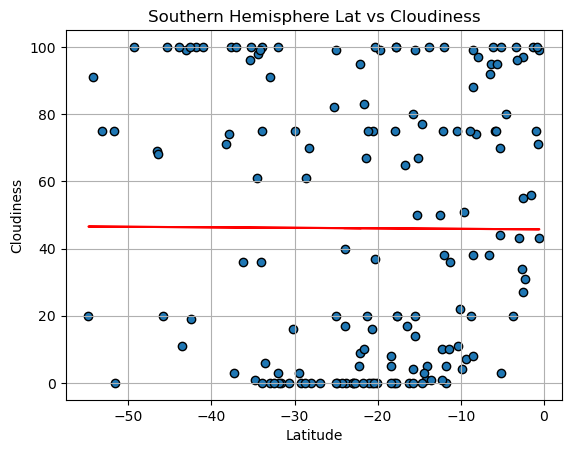

In [57]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", edgecolors='black')
plt.plot(x, line, color='red', label='Regression Line')
plt.title("Southern Hemisphere Lat vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r^2-value is: {r_value}")

**Discussion about the linear relationship:** One conclusion I can draw about both of these graphs is that while the data seems to be scattered evenly throughout the graphs, the points also seem to cluster around 0% cloudiness and 100% cloudiness. Even then, there is not really any conclusions that I personally can draw from this data.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.026915704802821037


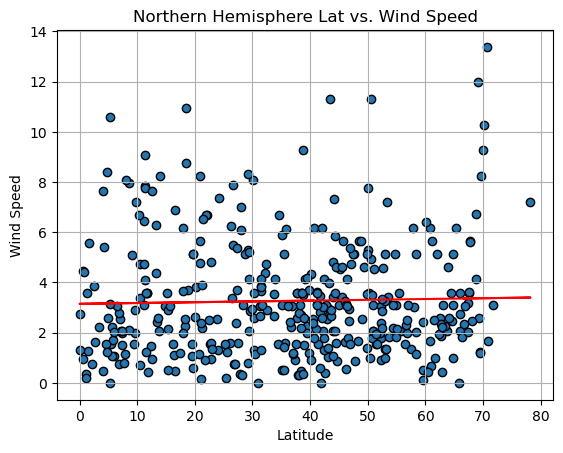

In [59]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", edgecolors='black')
plt.plot(x, line, color='red', label='Regression Line')
plt.title("Northern Hemisphere Lat vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r^2-value is: {r_value}")

The r^2-value is: -0.3129794873835694


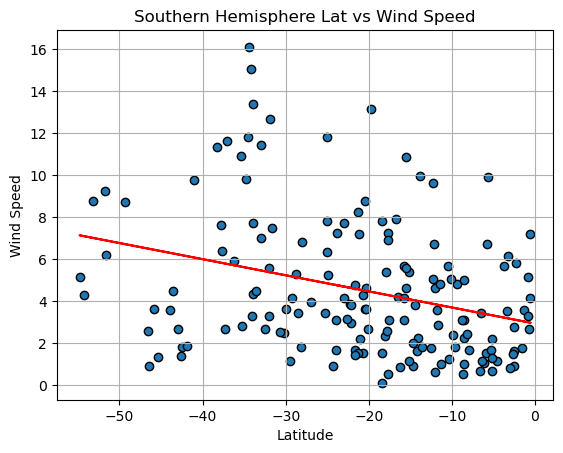

In [61]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", edgecolors='black')
plt.plot(x, line, color='red', label='Regression Line')
plt.title("Southern Hemisphere Lat vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r^2-value is: {r_value}")

**Discussion about the linear relationship:** The only real conclusion I can get from these graphs is that wind speed somewhat increases the farther south you go from the equator, but it is not really a significant amount. Most of the points are clustered in the 0-6 range in wind speed on both graphs.